# 데이터 불러오기 + 전처리

[Prophet 가이드](https://facebook.github.io/prophet/docs/quick_start.html) : 메타에서 만든 시계열 예측 자료 <br>
[Financedata 가이드](https://financedata.github.io/posts/finance-data-reader-users-guide.html) : 주가 및 주요경제 지표를 가져올 수 잇음

In [6]:
# pip install pandas pystan fbprophet # 라이브러리 일괄 설치 
import pandas as pd
from fbprophet import Prophet
import FinanceDataReader as fdr

In [158]:
df = fdr.DataReader('005935') # 회사 티커를 통해 데이터 불러옴

In [159]:
df # 편하게도 Date를 인덱스로 잡아줌. 하지만 모델에서는 날짜 피쳐 필요하니 인덱스 초기화
df.resample(rule='B') # 
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-25,380,389,348,348,822200,NaN
1998-05-26,337,339,306,307,362130,-0.117816
1998-05-27,306,342,300,339,498890,0.104235
1998-05-28,325,376,310,357,776630,0.053097
1998-05-29,355,367,342,357,284630,0.000000
...,...,...,...,...,...,...
2022-07-26,55800,56000,55500,55700,776839,-0.001792
2022-07-27,56000,56300,55200,56100,867650,0.007181
2022-07-28,56800,57000,56100,57000,875662,0.016043


In [160]:
df = df.reset_index()
df = df[['Date','Close']] # 날짜와 종가만 가져와서
df.columns = ['ds','y'] # 컬럼명 변경 'ds','y'
df

,ds,y
0,1998-05-25,348
1,1998-05-26,307
2,1998-05-27,339
3,1998-05-28,357
4,1998-05-29,357
...,...,...
5995,2022-07-26,55700
5996,2022-07-27,56100
5997,2022-07-28,57000
5998,2022-07-29,57000


# 모델 학습

In [161]:
m = Prophet(interval_width=0.95, daily_seasonality=False) # 예측을 위한 학습기간을 95% 수준으로 활용, 일자 내 변동성은 없음.
model = m.fit(df)

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14865.8    0.00937323        1540.2           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14900.7    0.00919035        260.13           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14916.7   0.000270543       515.779      0.2625      0.2625      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14923.7   0.000585608       142.511           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14928.2    0.00462631       607.051           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [162]:
future = m.make_future_dataframe(periods=100, freq='B') # 향후 100일 예측, 주중 데이터만 취급
forecast = m.predict(future)
forecast

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-05-25,645.845233,-7492.689957,8210.962954,645.845233,645.845233,-284.335426,-284.335426,-284.335426,21.478347,21.478347,21.478347,-305.813772,-305.813772,-305.813772,0.0,0.0,0.0,361.509808
1,1998-05-26,647.912748,-7453.209721,7825.269220,647.912748,647.912748,-193.785000,-193.785000,-193.785000,99.786145,99.786145,99.786145,-293.571145,-293.571145,-293.571145,0.0,0.0,0.0,454.127748
2,1998-05-27,649.980262,-7664.793097,8177.519377,649.980262,649.980262,-188.688625,-188.688625,-188.688625,92.172388,92.172388,92.172388,-280.861012,-280.861012,-280.861012,0.0,0.0,0.0,461.291637
3,1998-05-28,652.047777,-7454.450861,8446.660665,652.047777,652.047777,-169.295121,-169.295121,-169.295121,98.781533,98.781533,98.781533,-268.076654,-268.076654,-268.076654,0.0,0.0,0.0,482.752656
4,1998-05-29,654.115291,-6966.769994,8726.007802,654.115291,654.115291,-226.514495,-226.514495,-226.514495,29.100638,29.100638,29.100638,-255.615133,-255.615133,-255.615133,0.0,0.0,0.0,427.600796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,2022-12-13,71567.148043,63974.131147,79349.654798,71343.796315,71803.824348,599.460455,599.460455,599.460455,99.786145,99.786145,99.786145,499.674311,499.674311,499.674311,0.0,0.0,0.0,72166.608498
6096,2022-12-14,71587.310133,64355.441645,79905.562068,71361.626489,71825.721486,610.987924,610.987924,610.987924,92.172388,92.172388,92.172388,518.815537,518.815537,518.815537,0.0,0.0,0.0,72198.298057
6097,2022-12-15,71607.472222,64403.451241,79497.119853,71379.467488,71846.258315,635.095738,635.095738,635.095738,98.781533,98.781533,98.781533,536.314205,536.314205,536.314205,0.0,0.0,0.0,72242.567960
6098,2022-12-16,71627.634311,64300.691137,80297.237545,71397.308487,71866.795144,581.339715,581.339715,581.339715,29.100638,29.100638,29.100638,552.239077,552.239077,552.239077,0.0,0.0,0.0,72208.974027


# 트랜드 확인

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


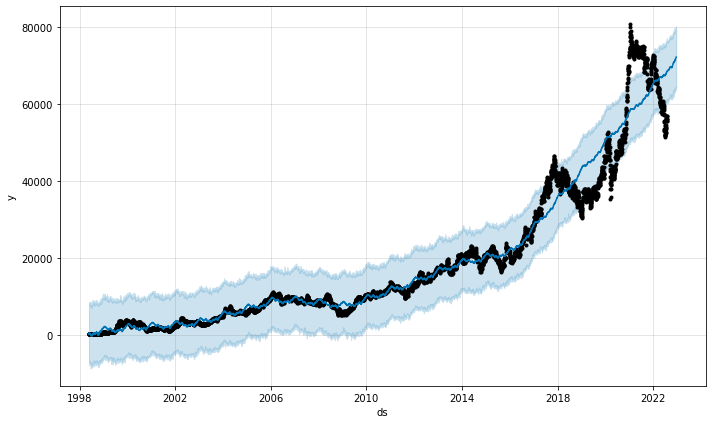

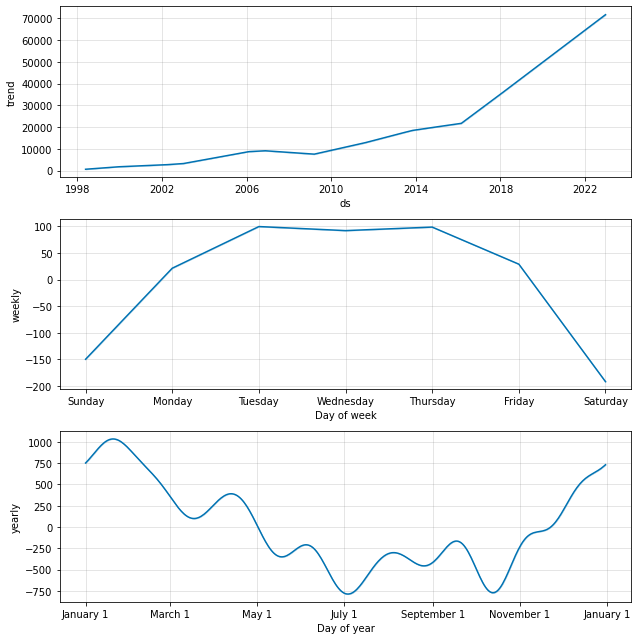

In [163]:
fig1 = m.plot(forecast) # 트랜드를 확인, 파란선을 기준/ 상 하단의 정상예측 범위, 검정색은 실제 값을 의미
fig2 = m.plot_components(forecast) # 계절성 점검, 


## 주요한 변화를 주는 변곡점을 확인 <br>
Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible. Consider the Peyton Manning forecast from the Quickstart. By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       15109.1    0.00326159       2764.74      0.9149      0.9149      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       15870.4     0.0128551       10126.9        0.54        0.54      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       17230.6     0.0559645       17754.8           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       17815.5    0.00483387       5706.86      0.3476      0.3476      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       18121.8    0.00427755       3864.77      0.8423      0.8423      557   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


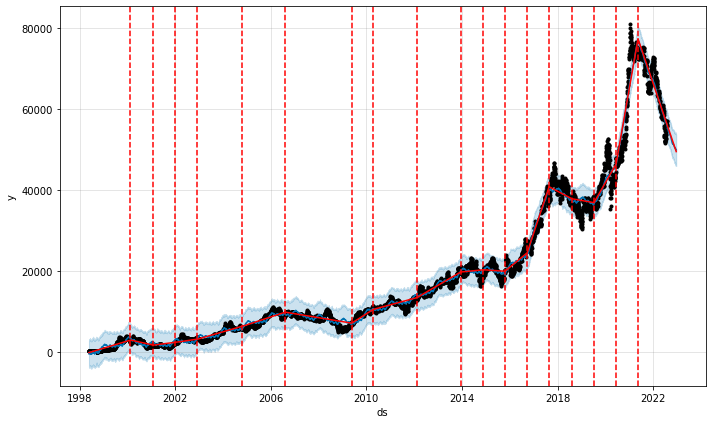

In [169]:
from fbprophet.plot import add_changepoints_to_plot

m = Prophet(changepoint_range= 0.95,interval_width=0.95, daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='B') # 향후 100일 예측, 주중 데이터만 취급
forecast = m.predict(future)

fig3 = m.plot(forecast)
cp = add_changepoints_to_plot(fig3.gca(), m , forecast) # default셋팅은 80% 의 지점까지를 인식하며, 모델 생성 시에 changepoint_range를 높일 수록 최근의 점을 인식

## 변곡점 직접 입력
If you wish, rather than using automatic changepoint detection you can manually specify the locations of potential changepoints with the changepoints argument. Slope changes will then be allowed only at these points, with the same sparse regularization as before. One could, for instance, create a grid of points as is done automatically, but then augment that grid with some specific dates that are known to be likely to have changes. As another example, the changepoints could be entirely limited to a small set of dates, as is done here

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       11003.1    5.0457e-05       1.99418           1           1       74   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


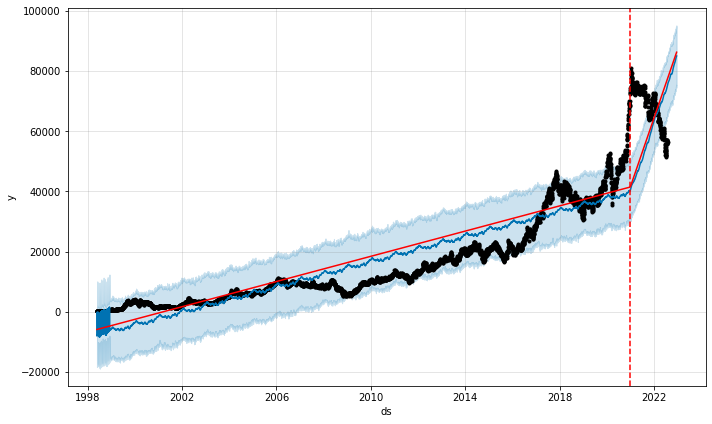

In [179]:
m = Prophet(changepoints= ['2021-01-01'])
forecast = m.fit(df).predict(future)

fig5 = m.plot(forecast)
cp = add_changepoints_to_plot(fig5.gca(), m , forecast) # default셋팅은 80% 의 지점까지를 인식하며, 모델 생성 시에 changepoint_range를 높일 수록 최근의 점을 인식

# 모델 평가하기

In [38]:
# 단순화 하여 확인해보면
f_st = forecast[['ds','yhat']]
f_st = f_st.set_index('ds')


In [146]:
# 특정 기간의 예측데이터와 실제 데이터 확인해보면
windows = pd.date_range('2022-07-01',periods=15,freq='B')

df_n.resample(rule = 'B')
a = f_st.loc[windows]
b = df_n.loc[windows]


df_check = pd.concat((a,b),axis =1)

import numpy as np

df_check['mae'] = np.abs(df_check['yhat']-df_check['y'])
df_check

,yhat,y,mae
2022-07-01,67479.407204,51500,15979.407204
2022-07-04,67519.060339,52000,15519.060339
2022-07-05,67619.333563,52200,15419.333563
2022-07-06,67636.571648,51900,15736.571648
2022-07-07,67671.018537,53500,14171.018537
2022-07-08,67632.077556,53900,13732.077556
2022-07-11,67730.890621,54200,13530.890621
2022-07-12,67848.478083,52900,14948.478083
2022-07-13,67881.520857,52600,15281.520857
2022-07-14,67930.124338,53500,14430.124338


In [170]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='90 days', horizon= '365 days')
df_cv

INFO:fbprophet:Making 86 forecasts with cutoffs between 2000-08-21 00:00:00 and 2021-08-01 00:00:00
  0%|          | 0/86 [00:00<?, ?it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -11.9783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1248.48     0.0326918       287.908           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1274.3   0.000994357       96.3158      0.7201      0.7201      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1281.37    0.00742686       141.781      0.5305           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       1282.27    0.00312307       124.664   3.164e-05       0.001      405  LS failed, Hessian reset 
     367       1283.04   0.000238371       87.1574    2.52e-06       0.001      521  LS failed, Hessian reset 
     399       1283.05   4.29901e-07       72.5753      0.2148      0.2148      570   
    Iter      log pro

  1%|          | 1/86 [00:00<01:02,  1.35it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.1435
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1318.47    0.00438475       346.491           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1345.06   0.000397186        115.78   1.799e-06       0.001      247  LS failed, Hessian reset 
     199       1346.22    0.00082485       85.5716      0.9323      0.9323      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1359.91   0.000228062       108.728      0.3436      0.3436      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       1360.73    0.00118574       249.839    1.33e-05       0.001      439  LS failed, Hessian reset 
     399       1362.09    0.00847085       136.089       9.118      0.9118      534   
    Iter      log pro

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  2%|▏         | 2/86 [00:01<00:59,  1.42it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -31.8734
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1375.94    0.00335164       112.235      0.3658      0.3658      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1415.06    0.00144297       122.669      0.6212      0.6212      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       1415.27   0.000285521       94.9942   2.562e-06       0.001      287  LS failed, Hessian reset 
     299       1422.81   0.000289277       176.732      0.2021      0.2021      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       1426.34   0.000277137       100.238   2.598e-06       0.001      495  LS failed, Hessian reset 
     391       1426.95   0.000242185       88.7442   3.144e-06       0.001      587  LS failed, Hessian rese

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  3%|▎         | 3/86 [00:02<01:02,  1.33it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -31.3682
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1468.41     0.0123966       338.301      0.5941      0.5941      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1511.67   0.000956032       246.193      0.1019      0.1019      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       1524.73    0.00058618       163.384   5.617e-06       0.001      400  LS failed, Hessian reset 
     299       1525.27   0.000852773       188.554      0.4463           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1532.97     0.0409037       172.948      0.4059      0.6985      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       1532.99   0.000334492    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  5%|▍         | 4/86 [00:03<01:08,  1.20it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -39.2724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1598.44     0.0311944       120.829           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1650.99    0.00234286       178.291      0.8058      0.8058      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1664.78    0.00042279       70.0237      0.3542           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1667.52    0.00293284       81.2301           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     449       1674.78   0.000951056        232.27    6.11e-06       0.001      588  LS failed, Hessian reset 
     499       1679.04      0.001394    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  6%|▌         | 5/86 [00:03<01:02,  1.29it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.8447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1687.69     0.0329931       543.897           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194        1739.5    0.00222024       388.407   1.492e-05       0.001      252  LS failed, Hessian reset 
     199       1742.06     0.0204339        346.16           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       1756.85   0.000329883       120.678   3.703e-06       0.001      388  LS failed, Hessian reset 
     299        1757.9    0.00568085       211.235      0.9932      0.9932      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342        1764.4    0.00237985       418.406   1.937e-05       0.001      500  LS failed, Hessian rese

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  7%|▋         | 6/86 [00:04<01:08,  1.17it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.5429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1750.13     0.0953335       375.527           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1803.41    0.00904128       439.247      0.3259      0.3259      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       1827.42   0.000449577       177.763    2.73e-06       0.001      338  LS failed, Hessian reset 
     299       1832.76      0.043531       406.879           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1853.09     0.0298301       275.877           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1881.17   0.000529175    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  8%|▊         | 7/86 [00:06<01:14,  1.05it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.6254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1834.05     0.0521076       359.572           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1923.43     0.0914585       363.624           1           1      218   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       1959.28   0.000781863       254.633   1.199e-06       0.001      363  LS failed, Hessian reset 
     299       1960.44    0.00624024       155.849           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1983.37    0.00117325       127.965           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     437       1986.16   0.000401812    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
  9%|▉         | 8/86 [00:06<01:12,  1.07it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.4069
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1928.12     0.0119857       283.382      0.7056      0.7056      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1977.33     0.0159397       274.828      0.5116      0.5116      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1998.31    0.00125168       83.4977      0.8354      0.8354      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2020.43    0.00424218       105.532      0.9164      0.9164      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2029.57    0.00209965       91.4785           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 10%|█         | 9/86 [00:07<01:07,  1.15it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be r

Initial log joint probability = -26.2924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2002.08     0.0767606       1116.58           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2059.4     0.0249413       291.475           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2072.49     0.0042927       179.038           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2098.29    0.00456561       103.666           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2109.42     0.0257737       201.132           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 12%|█▏        | 10/86 [00:08<01:04,  1.17it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.8357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2069.89     0.0757787       419.702           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2191.56     0.0680554       383.182      0.6723      0.6723      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2210.43     0.0133534        156.53      0.4311           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       2211.72     0.0003595       162.287    1.58e-06       0.001      411  LS failed, Hessian reset 
     399       2221.16     0.0146065       564.956      0.3682      0.3682      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485        2234.9    0.00161239    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 13%|█▎        | 11/86 [00:09<01:13,  1.02it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.7483
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2203.64    0.00773084       432.415           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2317.97     0.0240675        195.42           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2361.09     0.0141618       410.907      0.3852           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2396.43    0.00102491       88.9798      0.6887      0.6887      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2401.54   0.000323296       72.6353      0.3414      0.3414      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 14%|█▍        | 12/86 [00:10<01:13,  1.01it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.4837
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2270.7     0.0198777       368.852      0.7374      0.7374      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2358.21    0.00596572       596.304      0.3384      0.8898      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2394.86    0.00380005       96.9865           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       2395.15    0.00156613       144.323   1.637e-05       0.001      391  LS failed, Hessian reset 
     357       2397.62     0.0019113        304.69    1.46e-05       0.001      485  LS failed, Hessian reset 
     399       2400.08   0.000969707       103.844      0.5417           1      544   
    Iter      log pro

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 15%|█▌        | 13/86 [00:11<01:12,  1.01it/s]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -30.7558
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2373.19     0.0460362       208.926      0.4859      0.4859      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2424.17    0.00614592       173.281      0.4954      0.4954      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       2447.81     0.0015994       297.984   7.194e-06       0.001      376  LS failed, Hessian reset 
     299       2448.78    0.00335326       100.193           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2458.67    0.00603653       118.616           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2469.91    0.00220341    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 16%|█▋        | 14/86 [00:12<01:15,  1.05s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3040.82     0.0107857       895.385      0.3057           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3170.06     0.0298517        408.01           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3200.59    0.00108607        348.48      0.3903      0.3903      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3225.78    0.00416131       136.561           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3238.84    0.00161869         197.2       0.661       0.661      584   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 17%|█▋        | 15/86 [00:14<01:25,  1.20s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.3141
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3199.43     0.0277069       841.436      0.7863      0.7863      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3363.85   0.000322964       243.602           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3461.6    0.00983083        361.24           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3520.31    0.00486597       183.913           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     492       3543.37    0.00012751       157.038   1.179e-06       0.001      607  LS failed, Hessian reset 
     499       3543.95    0.00960659    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 19%|█▊        | 16/86 [00:16<01:37,  1.39s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.2576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3360.8     0.0451982       936.712           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3460.62    0.00418951        178.72           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3504.8    0.00502166       160.706           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3528.11   0.000662634       262.354      0.2525           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3534.9     0.0018891       182.241       0.942       0.942      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 20%|█▉        | 17/86 [00:17<01:33,  1.35s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -17.4159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3405.53      0.008841       520.075           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3473.18     0.0432475       539.891           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3516.52     0.0161511       458.031           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3544.5    0.00241988       95.1257           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3553.85    0.00132486       126.232      0.4739      0.4739      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 21%|██        | 18/86 [00:18<01:33,  1.37s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.4296
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3400.44     0.0273318       417.868           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3520.92      0.134987        798.82           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3611.97     0.0910964       463.597           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       3633.06   0.000500558       313.367   4.579e-06       0.001      470  LS failed, Hessian reset 
     399       3636.07     0.0272101       287.836           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3653.45     0.0146195    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 22%|██▏       | 19/86 [00:20<01:41,  1.52s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.3875
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3526.55     0.0578569       1514.11      0.1684           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3779.12     0.0260624       441.508           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3877.04    0.00973497       499.057           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3919.88    0.00880545       1013.76      0.5669      0.5669      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3935.31    0.00135636       263.728      0.9162      0.9162      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 23%|██▎       | 20/86 [00:22<01:50,  1.67s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -25.0311
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3901.41      0.183519       1925.08           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4074.11     0.0106566       351.626      0.7667      0.7667      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4149.96     0.0118384       325.947           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4194.09       0.01684       903.867           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4218.43    0.00465623       320.091           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 24%|██▍       | 21/86 [00:24<01:47,  1.65s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.327
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4203.21      0.101326       1115.56           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4322.73    0.00595566         370.3           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4381.13     0.0597337        614.45           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4421.36    0.00245121       199.193           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4432.6   0.000549682       107.423      0.8519      0.8519      566   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 26%|██▌       | 22/86 [00:26<01:48,  1.70s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.6898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4454.79    0.00921274       723.505           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4585.62    0.00331129       423.682           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4647.69     0.0335254       1442.24           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4695.94   0.000938514       140.302      0.8235      0.8235      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4734.79    0.00417467       656.922           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 27%|██▋       | 23/86 [00:28<01:58,  1.88s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -40.4913
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4635.88     0.0300498       1247.44           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4917.24     0.0688258        1008.2           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5028.1     0.0116396       858.783           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5083.18     0.0160174       475.583           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5138.69     0.0145676       598.386       0.617       0.617      556   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 28%|██▊       | 24/86 [00:30<01:49,  1.77s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.2088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4793.61     0.0588802       1019.41           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5054.12      0.013936       1262.95           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5131.33    0.00411355        179.49           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5149.4    0.00907634       262.459       0.886       0.886      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5170.7    0.00193248       436.858           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 29%|██▉       | 25/86 [00:31<01:45,  1.73s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.4577
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4953.48     0.0856204       1203.78           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5124.88    0.00161826        373.09           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5164.14    0.00848073       649.674           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5181.74     0.0373154        308.86           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     478       5193.37    7.3158e-05       139.459   4.229e-07       0.001      611  LS failed, Hessian reset 
     499       5194.43   0.000772422    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 30%|███       | 26/86 [00:33<01:45,  1.76s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -16.1334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4992.18     0.0229887       932.927      0.5217      0.5217      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5123.75      0.101081       2025.26           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5162.96    0.00236427       424.513      0.2494           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5188.81     0.0166432       219.091           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5199.1   0.000239229       163.497      0.2692      0.2692      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 31%|███▏      | 27/86 [00:34<01:35,  1.62s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.3346
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4986.36     0.0137397       1131.87      0.4075           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5062.47    0.00676445       352.275      0.5025      0.5025      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5112.32    0.00641499       747.857       0.288       0.288      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5143.06     0.0041993       267.335      0.8417      0.8417      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5163.17     0.0142132       297.072           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 33%|███▎      | 28/86 [00:36<01:41,  1.74s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -18.0677
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5150.24     0.0124677       699.343           1           1      108   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5235.58     0.0307256       560.158           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5407.21     0.0971496       2100.64      0.8766      0.8766      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5515.02     0.0130942       540.169           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5539.51    0.00254396       555.851       1.594      0.1594      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 34%|███▎      | 29/86 [00:40<02:07,  2.24s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.323
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5328.06     0.0247076       913.795           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5660.15    0.00830689       1708.47           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5870.56      0.052597       1397.68           1           1      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5931.04     0.0255976        716.27           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5966.35     0.0369726       1688.43      0.3656           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 35%|███▍      | 30/86 [00:42<02:07,  2.28s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -25.3039
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5576.03     0.0127149       1891.56           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6053.09    0.00537203       835.548           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6197.06     0.0301559       674.007           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6255.08    0.00145686       643.003           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6349.31   0.000335137       648.074           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 36%|███▌      | 31/86 [00:45<02:07,  2.32s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -15.7706
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5840.69     0.0402695       1622.03           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6042.57    0.00263177       898.345           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6323.48     0.0178725       659.795      0.2476           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6370.38      0.185584       1914.64           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6408.99     0.0172845       359.487      0.7042      0.7042      555   
    Iter      log prob        ||dx||      ||grad||       alpha  

 37%|███▋      | 32/86 [00:47<02:08,  2.38s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -29.7357
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5755.08    0.00940158       545.202           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6002.84     0.0776036        1013.6           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6168.59    0.00795404       807.077      0.8482      0.8482      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6264.89     0.0012801       471.085      0.3616      0.3616      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6309.35    0.00325154       1233.32           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 38%|███▊      | 33/86 [00:49<02:00,  2.27s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -51.4767
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5989.36     0.0755917       1025.86           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6189.39     0.0575668       449.673           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6314.09      0.353842       4306.95           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6372.83    0.00348201       144.681           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6397.31      0.006225       519.135      0.2773      0.6929      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 40%|███▉      | 34/86 [00:52<02:07,  2.45s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.0278
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5830.48      0.033316       1249.14           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5949.34    0.00903167       870.393           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6074.55    0.00420229       414.995      0.3778      0.3778      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6119.57      0.107618       726.944      0.9163     0.09163      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6156.75    0.00182742       508.901      0.6915      0.6915      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 41%|████      | 35/86 [00:54<02:01,  2.38s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.0689
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5932.16    0.00553637       944.711           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6086.42    0.00226348       335.913           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6137.53    0.00299462       346.186      0.7137      0.7137      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6193.62     0.0021353       327.227           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6220.66     0.0211672       552.669           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 42%|████▏     | 36/86 [00:57<02:09,  2.58s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -40.2123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6109.36     0.0553899       615.187           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6195.51    0.00551916       697.477      0.3147      0.3147      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6291.58     0.0430818       937.626      0.7012           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6315.14    0.00808402       336.053           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6333.43   0.000793856       1448.34      0.6232      0.6232      559   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 43%|████▎     | 37/86 [00:59<02:00,  2.45s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.1177
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5862.09     0.0802744       824.698           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5947.54   0.000621117       228.072           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5981.83     0.0104732       267.726           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6014.66    0.00300711       990.503      0.6907      0.6907      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6030.19    0.00418742       145.172      0.7427      0.7427      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 44%|████▍     | 38/86 [01:01<01:51,  2.33s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -27.0605
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5746.45     0.0781047       944.557           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185          5831   0.000142276       126.701    1.07e-06       0.001      252  LS failed, Hessian reset 
     199       5832.57   0.000363578       366.119      0.6891      0.6891      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5837.04   0.000109879       82.2851   6.308e-07       0.001      344  LS failed, Hessian reset 
     299       5846.89     0.0101028       395.732      0.6168      0.6168      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5863.22    0.00269709       73.7535      0.7787      0.7787      553   
    Iter      log pro

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 45%|████▌     | 39/86 [01:04<01:48,  2.30s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.5558
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5714.07     0.0723892       1501.88           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5823.67     0.0101592        458.59           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5832.89    0.00215586        95.526      0.3861           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5842.35   0.000596058       202.436      0.4823      0.4823      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5847.23   0.000768893       58.9052           1           1      608   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 47%|████▋     | 40/86 [01:06<01:41,  2.22s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.7405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5905.4     0.0235768       323.291           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5996.73    0.00527005        746.36     0.07943           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6012.41     0.0131869       346.204           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       6015.37    0.00026688       236.826   7.272e-07       0.001      391  LS failed, Hessian reset 
     399       6020.41     0.0119455       351.296           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405       6022.29    0.00134089    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 48%|████▊     | 41/86 [01:08<01:36,  2.14s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -25.7263
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5964.35     0.0319273       567.108           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6140.79    0.00310941       150.053           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       6171.71    0.00209784       240.425   3.501e-06       0.001      335  LS failed, Hessian reset 
     299       6178.82     0.0091109       291.886      0.2736      0.6842      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6189.28     0.0178029       211.668           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     494       6194.64   0.000253719    

 49%|████▉     | 42/86 [01:10<01:34,  2.14s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.3354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6524.02     0.0383579       1057.21           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6719.52    0.00207331       227.984           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6786.01    0.00617987       203.109           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     383       6800.15   0.000607156       253.081   7.854e-06       0.001      505  LS failed, Hessian reset 
     399       6801.47   0.000549296       78.6378           1           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6807.26   0.000426586    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 50%|█████     | 43/86 [01:12<01:34,  2.19s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.9212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7035.46      0.161432       2852.55           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7299.04    0.00741355        357.74           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7424.54     0.0045985       745.177      0.5811      0.5811      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7507.3     0.0185208       1783.61      0.2339           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7583.46     0.0955214       994.866           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 51%|█████     | 44/86 [01:15<01:34,  2.25s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -19.2741
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7391.7    0.00882351       647.835      0.7858      0.7858      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7723.54    0.00149393       728.361      0.1936      0.1936      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7873.86    0.00680308       2583.29      0.1509           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7970.13     0.0300432        1433.6           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8011.86     0.0158795       859.153           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 52%|█████▏    | 45/86 [01:17<01:35,  2.34s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.2117
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7416.71     0.0193036        1315.9      0.3844      0.3844      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7561.81     0.0123916       1412.38           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7666.24     0.0606565       1359.85           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7719.28     0.0157001       1922.32      0.1705           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7750.1    0.00185607       112.906           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 53%|█████▎    | 46/86 [01:20<01:38,  2.47s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -22.9262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7566.46    0.00363974       908.902           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7727.96     0.0229495       899.525      0.3694           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7780.81   0.000173705       338.003   4.924e-07       0.001      390  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7806.82     0.0142631       340.792           1           1      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7843.81    0.00175372       157.763      0.8742      0.8742      608   
    Iter      log prob        ||dx||    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 55%|█████▍    | 47/86 [01:23<01:43,  2.65s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.3289
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8109.95    0.00823032        1425.1           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8376.73    0.00829988       1512.63      0.6836      0.6836      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8484.74       0.45809          1598           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8559.95     0.0080214       756.448      0.4749           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8582.88    0.00602836       1201.33     0.08624           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 56%|█████▌    | 48/86 [01:28<02:07,  3.37s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.6396
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8505.09     0.0468427       4453.26           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8682.51     0.0189655       1077.48           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8823.24     0.0106741       2319.59      0.6664      0.6664      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8930.01     0.0128886       1202.73           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8963.14     0.0024469       1250.77      0.2805      0.2805      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 57%|█████▋    | 49/86 [01:31<02:02,  3.32s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.4442
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8501.58     0.0044723       791.678      0.7969      0.7969      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8855.21     0.0239266       1079.48           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8934.75    0.00307837       353.855           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9047.28    0.00588395       296.622      0.2359      0.8064      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9132.3    0.00806601        690.55           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 58%|█████▊    | 50/86 [01:36<02:11,  3.65s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -50.7728
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8945.75     0.0223971          2134           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9295.97     0.0139457       2242.08           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9375.58     0.0204805       1148.24           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9465.73      0.148215       1692.42           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9493.84    0.00576479       634.501      0.3195           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 59%|█████▉    | 51/86 [01:39<02:06,  3.62s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -39.4246
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9159.88    0.00434762       2828.86       0.193           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9506.59     0.0289174       4477.61           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9580.46     0.0062991       783.939           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9666.12     0.0295939        2667.2           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9709.02    0.00252225       292.435           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 60%|██████    | 52/86 [01:44<02:13,  3.92s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.5921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9580.74     0.0294012       2429.56           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9860.76      0.017315       750.856           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9986.94     0.0058177       537.984       0.927       0.927      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10070.5    0.00428633       919.521           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10114.7     0.0410979       919.468           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 62%|██████▏   | 53/86 [01:48<02:15,  4.11s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.4944
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9800.12    0.00185933       1172.41           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10091.3     0.0692007       3095.41           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10193.4     0.0176792       1790.68      0.7914      0.7914      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10317.9    0.00210389       458.309           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10387.2    0.00218947       386.018      0.3314      0.3314      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 63%|██████▎   | 54/86 [01:53<02:16,  4.26s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -58.7338
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10080.6    0.00797931        1216.7           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10313.8    0.00157239       1254.14      0.4472      0.4472      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         10469     0.0728199       1581.46      0.8884      0.8884      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         10536     0.0182475       1739.34           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10577.8     0.0181348       690.357           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

 64%|██████▍   | 55/86 [01:58<02:21,  4.57s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.9347
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10371.9     0.0107897       1687.26           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10506.7    0.00231654       1632.22      0.6192      0.6192      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10727.1     0.0189842       848.317       0.854       0.854      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10851.6    0.00382421       1248.88      0.4685      0.4685      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10951.4    0.00736316        419.31           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 65%|██████▌   | 56/86 [02:04<02:28,  4.95s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10813.9     0.0152867       4088.12      0.5723      0.5723      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10986.9    0.00890292       662.876           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11209.5     0.0761259       2563.65           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11365.9    0.00581898       694.302           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11447.4    0.00134736       2770.38      0.6461      0.6461      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 66%|██████▋   | 57/86 [02:09<02:24,  4.99s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -27.6179
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10874.1     0.0419042       3941.87      0.4443           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11410.6     0.0279795       3742.35           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11565.8    0.00898821       1149.46           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         11647    0.00676343       858.993           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11703.4    0.00909025       2179.66      0.1826           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 67%|██████▋   | 58/86 [02:14<02:21,  5.04s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.2816
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10916.2     0.0052729       1574.83      0.2582           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11213.2     0.0103434       3066.47      0.5217           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11353.9     0.0165861       594.397      0.2056           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11420.1     0.0296202       1242.38           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11459.7     0.0917853       1700.54           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 69%|██████▊   | 59/86 [02:18<02:08,  4.76s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -49.3232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11038.4    0.00760026       2107.27      0.8005      0.8005      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11240.9    0.00842898       2299.41      0.6708      0.6708      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11426.8      0.014951       1632.89           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11506.2    0.00629944       3351.59      0.2719           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11553.4    0.00605167       1199.63      0.8743      0.8743      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

 70%|██████▉   | 60/86 [02:24<02:08,  4.95s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.4428
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         11065    0.00602597       2483.71           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11355.4      0.025182        1754.5           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11511.4     0.0490037       1557.18           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11614.8     0.0745061       1402.75           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11655.9     0.0207777        1320.6           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 71%|███████   | 61/86 [02:29<02:07,  5.10s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -19.874
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       10938.9     0.0173778       2227.33           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11150.5      0.025064       2006.95           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11275.9      0.211425        1773.4           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11340.6     0.0227437       1492.66      0.4149           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11386.2    0.00250743       338.395           1           1      562   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 72%|███████▏  | 62/86 [02:34<02:01,  5.05s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -45.1116
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11137.4      0.010457       1413.19           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11374.4     0.0691919       2122.03           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11444.7    0.00198943       1096.33           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11541.7     0.0161745       674.459           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11608.4    0.00372402          1673      0.3425      0.7374      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 73%|███████▎  | 63/86 [02:38<01:49,  4.75s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.2519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11162.5     0.0191922       1606.61           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11349.7    0.00480046       1309.01           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         11591    0.00308165       501.872           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11657.4    0.00147382       463.017           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         11690     0.0606295       651.658       1.801      0.1801      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 74%|███████▍  | 64/86 [02:44<01:50,  5.01s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -26.5922
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11345.4     0.0777389        6166.9           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11603.6     0.0624223       4224.59           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11760.8    0.00617392       1380.69           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11802.9   0.000817247        900.38      0.3342      0.3342      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11879.7     0.0132889        618.87        0.25           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 76%|███████▌  | 65/86 [02:49<01:47,  5.14s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -64.702
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12161.8     0.0442387       3687.14           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12431.3    0.00167955       1046.24           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12594.4     0.0397976       1207.12           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12636.5    0.00138706       768.956           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12663.7     0.0093802       1250.43      0.9014      0.9014      580   
    Iter      log prob        ||dx||      ||grad||       alpha   

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 77%|███████▋  | 66/86 [02:54<01:42,  5.11s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -51.7615
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12190.4     0.0116317       3170.26           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12443.3    0.00369022       1439.42      0.6003      0.6003      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12521.7    0.00860655       1630.11      0.5221           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12604.8    0.00212445       1134.18           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12637.3   0.000302542       411.165           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 78%|███████▊  | 67/86 [03:00<01:38,  5.20s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -99.4756
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12586.2    0.00648669       6621.19       0.197           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12741.3    0.00662768       583.299      0.9371      0.9371      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         12817    0.00104818       1541.76           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12839.8    0.00178841       368.278      0.7223      0.7223      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12856.4     0.0129515       935.759      0.5043           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 79%|███████▉  | 68/86 [03:03<01:24,  4.67s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -138.401
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12661.8      0.012138       1583.18           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12783.9    0.00757714       336.849           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12833.2    0.00409247       425.253           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12847.8    0.00297695       407.746           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12857.1    0.00783947       523.105           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 80%|████████  | 69/86 [03:07<01:17,  4.53s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -145.363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12467.4    0.00511791       1066.12      0.4655      0.4655      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12570.5    0.00423578       1332.68      0.1819       0.896      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12586.2    0.00188353       232.324           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12592.2    0.00316623       330.365           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12601.9    0.00213745       677.146      0.2415      0.2415      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

 81%|████████▏ | 70/86 [03:10<01:03,  3.96s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -181.459
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12418.6      0.105685       2696.38           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12505.6   0.000596989       446.872           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12524.5     0.0056832       1667.84           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12546.8     0.0135918        2051.2      0.3906           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12554.6    0.00515354       618.598      0.1123           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 83%|████████▎ | 71/86 [03:14<00:58,  3.92s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12380.5     0.0421098       1831.54           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12515.4     0.0396781       3038.92      0.2787           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12557.7    0.00185902       856.631      0.6547      0.6547      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12576.8     0.0081942       353.646      0.9693      0.9693      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456         12585   6.02838e-05       225.514   3.403e-07       0.001      574  LS failed, Hessian reset 
     499       12586.6   0.000558517    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 84%|████████▎ | 72/86 [03:19<01:01,  4.37s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -110.509
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12565.9     0.0128692       1128.76           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12708.9    0.00313284       692.893           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12784.5    0.00368351        432.41           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12813.4     0.0111494       590.718           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12823.2    0.00273426       1296.53           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 85%|████████▍ | 73/86 [03:24<00:59,  4.59s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.8134
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         12875    0.00692058       3492.14      0.7304      0.7304      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13026.2    0.00588001       1207.46      0.3486           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13129.3    0.00456728       525.106           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13176.9   0.000746547       180.944        5.24       0.524      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13197.2    0.00494054       609.691      0.3051           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 86%|████████▌ | 74/86 [03:29<00:54,  4.50s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.4862
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13073.8     0.0128929       1268.11      0.6071      0.6071      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13229.1     0.0108258       602.863           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13377.6     0.0149651       1051.17           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         13406    0.00318714       466.586           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13417.9    0.00157302        251.96           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 87%|████████▋ | 75/86 [03:34<00:51,  4.71s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -75.99
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       12981.5    0.00444275       1693.33           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13141.7     0.0243235       5188.48     0.08205           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13223.1    0.00383962       778.932     0.06233           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13258.2    0.00141574       181.414           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13277.3    0.00275093       635.124           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 88%|████████▊ | 76/86 [03:38<00:44,  4.40s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -51.3784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         13070      0.016892       907.937           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13201.3     0.0429325       2224.37           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13266.5     0.0327095       1133.66     0.09957           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13286.4     0.0259295        786.66           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13297.5    0.00103804       149.279           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

 90%|████████▉ | 77/86 [03:41<00:37,  4.12s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -57.0766
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13132.7    0.00704721       1159.34           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13219.5    0.00339085       305.473      0.7816      0.7816      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13273.1    0.00279782       1053.64      0.1505           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13289.3    0.00643144       855.803      0.4413      0.4413      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       13295.9    0.00155478       221.499           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 91%|█████████ | 78/86 [03:44<00:31,  3.89s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.265
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         13276    0.00910143       1082.77           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13350.1     0.0107666        1393.4       0.305           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13376.5    0.00058986       256.459           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       13385.6   0.000294986       188.536   8.254e-07       0.001      442  LS failed, Hessian reset 
     399         13392    0.00196938       320.791           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         13401    0.00539572    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 92%|█████████▏| 79/86 [03:47<00:25,  3.58s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -181.415
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13953.4    0.00168476       967.669           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         14071   0.000336193       470.435      0.8211      0.8211      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14100.1     0.0213998       1691.77           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14113.5   0.000349261       131.074           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14115.5    0.00218171       227.965           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 93%|█████████▎| 80/86 [03:51<00:21,  3.54s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -73.2385
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14100.6    0.00231959       3205.39      0.1434      0.1434      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14169.8    0.00136795       519.929           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14197.7    0.00328755       508.974      0.5865      0.5865      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14204.2   7.58213e-05       109.334      0.2654      0.2654      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14210.3   0.000497944       126.654           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 94%|█████████▍| 81/86 [03:55<00:18,  3.79s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -154.982
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14287.8    0.00795724       832.337           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14331.7    0.00406578       722.896      0.4079           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14366.5     0.0271709       2340.54      0.5071      0.9913      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14387.4    0.00224132       279.622           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14402.4    0.00468859       721.606      0.4127           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 95%|█████████▌| 82/86 [03:58<00:13,  3.50s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -163.973
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14483.6    0.00482733       1073.94           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14540.2     0.0185431        1352.9      0.7191      0.7191      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14587.2   0.000651076       318.706           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399         14611    0.00337195       638.603           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14628.7    0.00459524       593.028           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 97%|█████████▋| 83/86 [04:01<00:10,  3.52s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -257.47
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       15548.3     0.0132101       1714.61           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       15610.7    0.00578834       700.551           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       15648.7     0.0182246       891.868      0.8214      0.8214      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       15654.9   0.000149548       532.927   2.898e-07       0.001      467  LS failed, Hessian reset 
     399       15663.6    0.00134257       266.425      0.7538      0.7538      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       15676.2   0.000266635     

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 98%|█████████▊| 84/86 [04:06<00:07,  3.85s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -242.847
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14853.9    0.00850827        732.24           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14874.3    0.00648637       350.701           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14889.8    0.00697791       837.382           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14899.3    0.00152877       366.062           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14909.6    0.00489989        452.66           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 99%|█████████▉| 85/86 [04:09<00:03,  3.62s/it]/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be 

Initial log joint probability = -214.704
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14628.5     0.0169505       1478.76           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14660.3   0.000697545       328.893      0.7443      0.7443      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14668.7   0.000629101       829.575      0.1747      0.1747      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14678.6    0.00161684       276.779      0.6268      0.6268      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     402       14678.7   4.64747e-05       208.133   1.726e-07       0.001      532  LS failed, Hessian reset 
     499       14681.5    0.00573091    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
100%|██████████| 86/86 [04:13<00:00,  2.95s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2000-08-22,3136.373042,2708.403008,3572.756350,2850,2000-08-21
1,2000-08-23,3162.726521,2782.223675,3543.480936,2780,2000-08-21
2,2000-08-24,3176.620506,2773.922846,3571.413237,2780,2000-08-21
3,2000-08-25,3209.807479,2779.109643,3633.579022,2780,2000-08-21
4,2000-08-28,3259.669370,2859.426097,3666.612773,2780,2000-08-21
...,...,...,...,...,...,...
21232,2022-07-26,69846.527151,62122.170584,77220.964603,55700,2021-08-01
21233,2022-07-27,69822.079930,62556.923653,76641.519185,56100,2021-08-01
21234,2022-07-28,69809.264939,62316.888660,76758.137804,57000,2021-08-01
21235,2022-07-29,69728.892162,62380.998753,77108.822839,57000,2021-08-01


In [171]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,1.910159e+07,4370.536392,2547.348344,0.144116,0.130330,0.427014
1,38 days,1.906324e+07,4366.147173,2546.962846,0.144629,0.130411,0.424117
2,39 days,1.883964e+07,4340.465861,2538.957257,0.144929,0.130386,0.423813
3,40 days,1.887358e+07,4344.373640,2546.272639,0.145724,0.131538,0.420930
4,41 days,1.921279e+07,4383.239185,2565.764142,0.146641,0.132534,0.418585
...,...,...,...,...,...,...,...
324,361 days,4.958991e+07,7042.010653,4592.540513,0.302879,0.224448,0.603870
325,362 days,4.962208e+07,7044.294428,4604.555879,0.302793,0.224448,0.603895
326,363 days,4.958221e+07,7041.463372,4597.919119,0.300662,0.222581,0.607690
327,364 days,4.924273e+07,7017.316091,4576.634384,0.298672,0.221313,0.612358


# 모델 조정


## 민감도 조정

트랜드에 대한 민감도를 조정하여 오버피팅, 언더피팅이 되지 않도록 조정할 수 있음. defaul는 0.05로 되어 있으며 증가 시 민감도 높아짐

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14930.9     0.0100843       1871.05           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14979.5      0.063276       1365.45           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       15012.6    0.00211759       151.594           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       15031.5     0.0108412       1163.05           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       15036.9    0.00577759       291.244           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


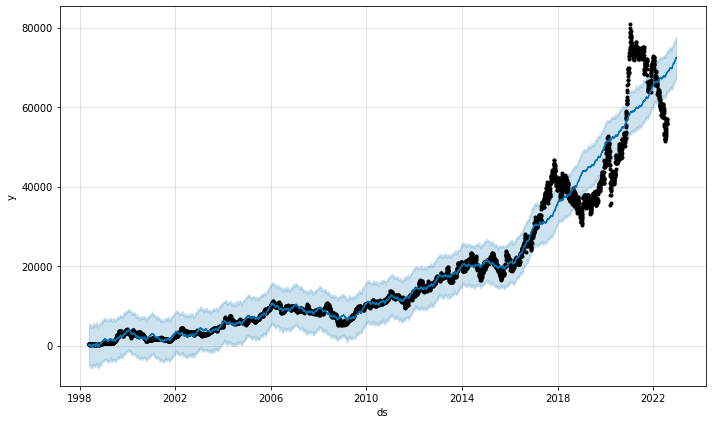

In [172]:
m = Prophet(changepoint_prior_scale = 0.5)
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='B') 
forecast = m.predict(future)

fig4 = m.plot(forecast)

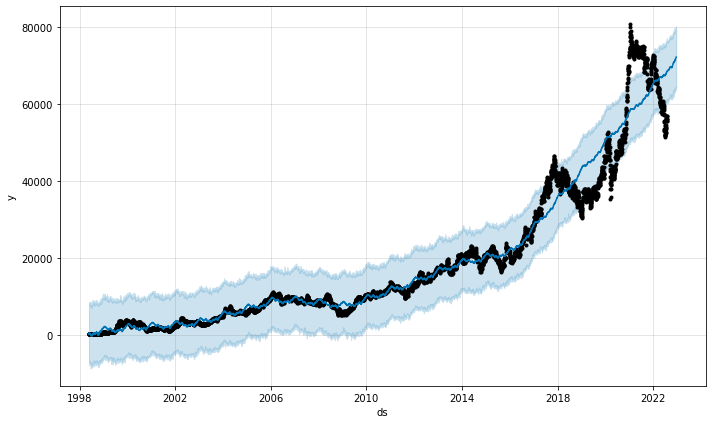

In [174]:
fig1 # 기존의 그래프보다 상/하 예측 폭이 적은 모델 확인

## Holiday 지정

In [180]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [181]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14861.3     0.0159692       2379.17      0.4056           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14888.9    0.00101265       237.378           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14912.7     0.0299342       972.174           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       14913.4   0.000109241       224.124   7.392e-07       0.001      405  LS failed, Hessian reset 
     399       14918.7    0.00278648       406.124           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14927.2    0.00215311    

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [182]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2402,2008-01-14,-1494.992795,0.000000
2910,2010-01-25,-1494.992795,0.000000
2920,2010-02-08,-1494.992795,1097.732999
3896,2014-01-13,-1494.992795,0.000000
3901,2014-01-20,-1494.992795,0.000000
3909,2014-02-03,-1494.992795,1097.732999
4140,2015-01-12,-1494.992795,0.000000
4392,2016-01-18,-1494.992795,0.000000
4397,2016-01-25,-1494.992795,0.000000


/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


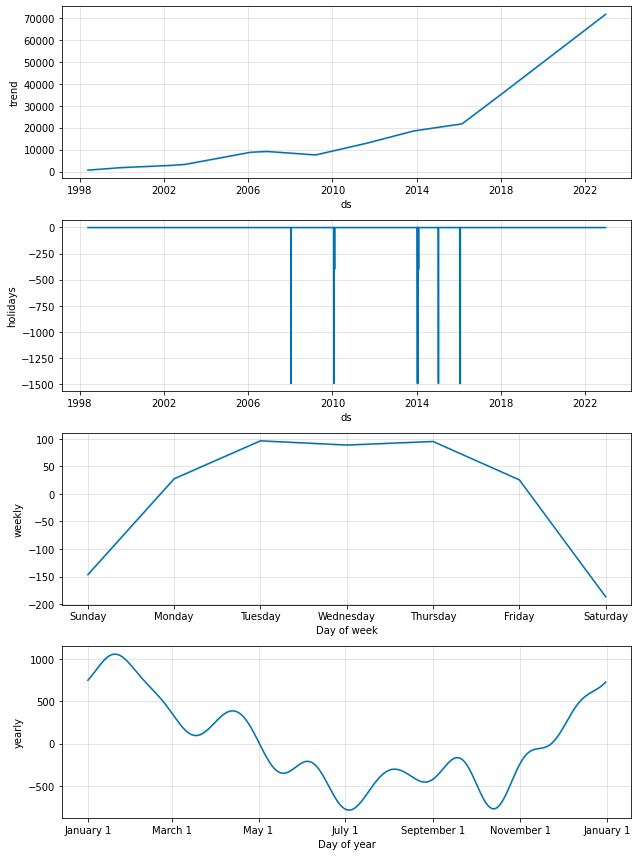

In [183]:
fig = m.plot_components(forecast)

## 국가 별 공식 Holiday 적용


In [184]:
# Python
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='KR')
m.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.1844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14862.1    0.00625456       881.203           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14900.3     0.0127609       534.136           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       14913.8    0.00402766       429.963      0.3679      0.3679      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14921.4     0.0102849       570.806           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14924.7    0.00458591        628.03      0.9905      0.9905      577   
    Iter      log prob        ||dx||      ||grad||       alpha  

    1285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       14938.2   0.000322916       95.0593           1           1     1404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1150         14939    7.4403e-05       223.271   1.404e-07       0.001     1498  LS failed, Hessian reset 
    1199       14939.5   5.11849e-05       94.1201           1           1     1562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1288       14939.6   1.93322e-06       54.6334      0.2153           1     1675   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [185]:
m.train_holiday_names

0                                            playoff
1                                          superbowl
2                                     New Year's Day
3          The day preceding of Lunar New Year's Day
4                               Lunar New Year's Day
5             The second day of Lunar New Year's Day
6                          Independence Movement Day
7                                  Tree Planting Day
8                             Birthday of the Buddha
9                                     Children's Day
10                                        Labour Day
11                                      Memorial Day
12                                  Constitution Day
13                                    Liberation Day
14                      The day preceding of Chuseok
15                                           Chuseok
16                         The second day of Chuseok
17                           National Foundation Day
18                                       Hange

/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/david/mambaforge/envs/env/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

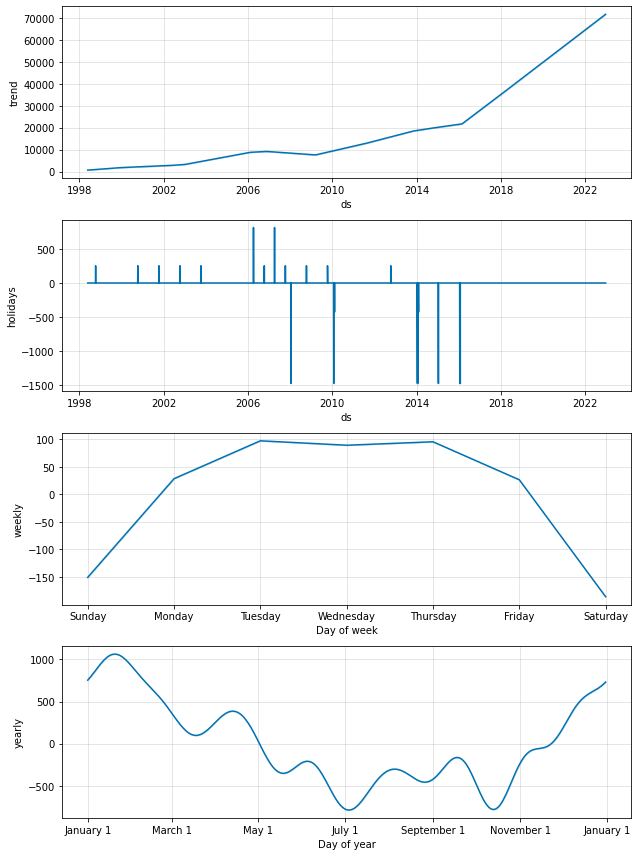

In [186]:
forecast = m.predict(future)
fig6 = m.plot_components(forecast)